In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [78]:
air=pd.read_csv("/content/Airlines+Data.csv")

In [79]:
air.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


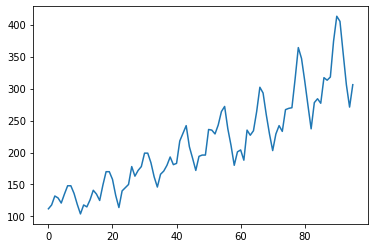

In [80]:
air.Passengers.plot() #trend, close to linear, seasonability, and multiplicative

In [81]:
air.shape

(96, 2)

In [82]:
#splitting the data
train=air.head(82)
test=air.tail(14)

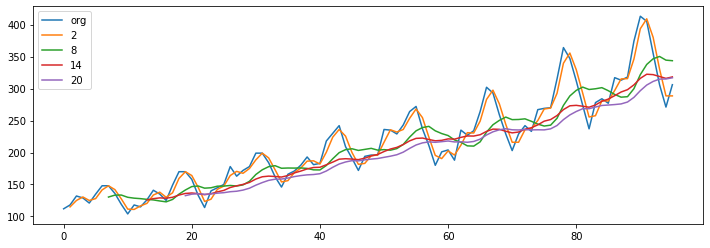

In [83]:
#moving average
plt.figure(figsize=(12,4))
air.Passengers.plot(label="org")
for i in range(2,24,6):
  air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

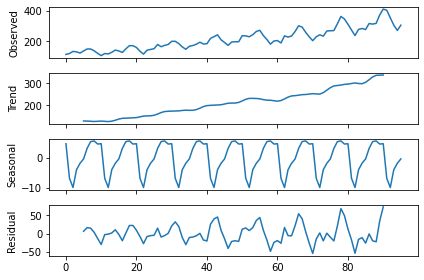

In [84]:
#time series decomposition plot
decompose=seasonal_decompose(air.Passengers,freq=10)
decompose.plot()
plt.show()

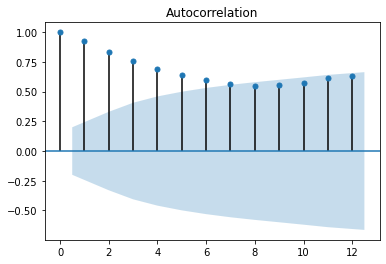

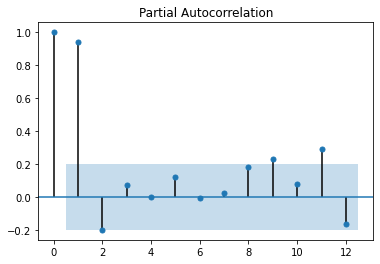

In [85]:
#acf and pacf plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air.Passengers,lags=12)
tsa_plots.plot_pacf(air.Passengers,lags=12)
plt.show()

In [86]:
#evaluation of mape, creating a function
def mape(pred,org):
  temp=np.abs((pred-org)/org)*100
  return np.mean(temp)

In [87]:
#simple exponential method
ses_model=SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.8)
pred_hw=ses_model.predict(start=test.index[0],end=test.index[-1])
mape(pred_hw,test.Passengers)

12.90380003849584

In [88]:
#holt method
hw_model=Holt(train['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw=hw_model.predict(start=test.index[0],end=test.index[-1])
mape(pred_hw,test.Passengers)

18.567853890770586

In [89]:
hwe_model_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add = hwe_model_add.predict(start = test.index[0],end = test.index[-1])
mape(pred_hwe_add,test.Passengers) 

2.1583222109125306

In [90]:
#holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul = hwe_model_mul.predict(start = test.index[0],end = test.index[-1])
mape(pred_hwe_mul,test.Passengers)


3.4348098823292466

In [91]:
#hence the best model is holts winter additive seasonality with additive trend
hwe_model_add=ExponentialSmoothing(air["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [92]:
#forecasting for next 10 time periods
hwe_model_add.forecast(10)

96     320.924021
97     313.638039
98     352.925020
99     350.350301
100    356.060923
101    408.899129
102    446.143114
103    433.358026
104    382.762460
105    336.170254
dtype: float64